In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("./input"))

['gender_submission.csv', 'test.csv', 'train.csv']


In [7]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\Himangshu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Himangshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Himangshu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Himangshu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Himang

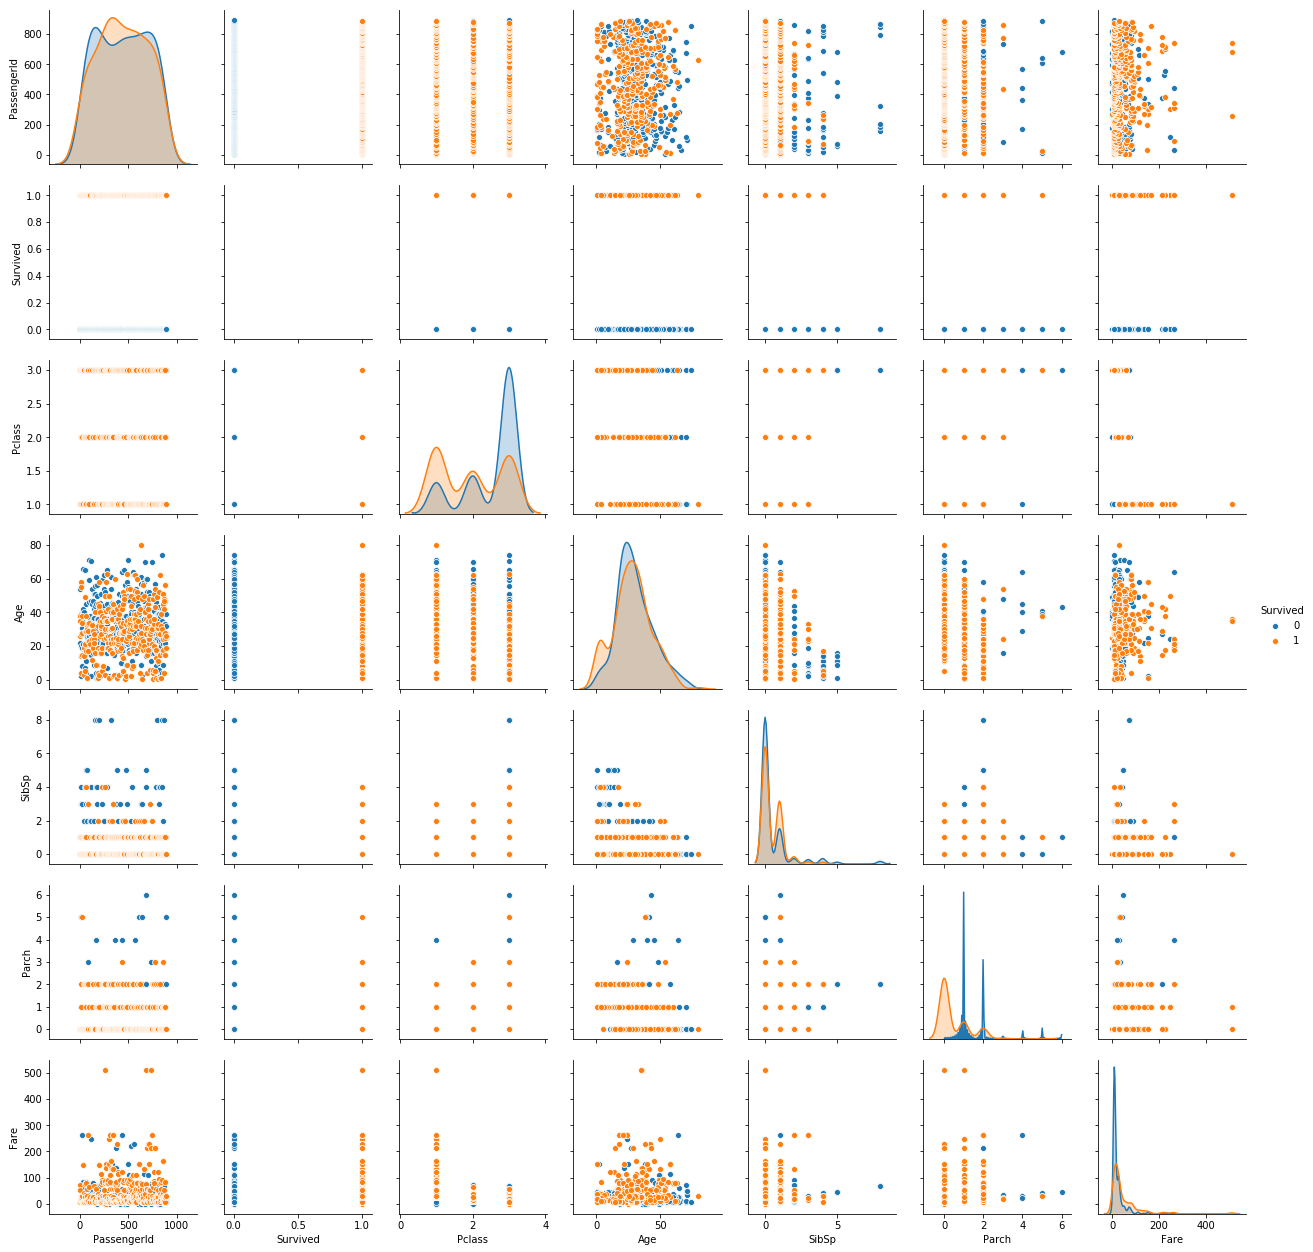

In [8]:
train.info()
sns.pairplot(train, hue="Survived")

### Transform the data

In [10]:
import re
titleRE = re.compile('\w+\.')

def transform(data):
    data['Title'] = data['Name']
    for i, row in data.iterrows():
        t = titleRE.findall(row['Title'])
        data.at[i,'Title'] = t[0]
    
    # Only Mr, Mrs, Miss and Master are in significant numbers - clump everyone else into a 5th category
    for i, row in data.iterrows():
        if not(row['Title'] == 'Mr.' or row['Title'] == 'Mrs.' or row['Title'] == 'Miss.' or row['Title'] == 'Master.'):
            data.at[i, 'Title'] = 'Other'

    # Check if all Mr./Master. -> male and all Mrs./Miss. are females
    for i, row in data.iterrows():
        if (row['Title'] == 'Mr.' or row['Title'] == 'Master.') and row['Sex'] == 'female':
            print("ERROR : Found a female with the wrong title! Row ", i)
        elif (row['Title'] == 'Mrs.' or row['Title'] == 'Miss.') and row['Sex'] == 'male':
            print("ERROR : Found a male with the wrong title! Row ", i)
     
    # Since Mr. and Master. are males, and Mrs. and Miss. are females, no need to keep Sex as Sex/Title are dependent
    for i, row in data.iterrows():
        if row['Sex'] == 'male' and row['Title'] == 'Other':
            data.at[i, 'Title'] = 'Other_m'
        elif row['Sex'] == 'female' and row['Title'] == 'Other':
            data.at[i, 'Title'] = 'Other_f'
            
    # Since siblings/spouse or parent/child being numeric doesn't contribute much, we convert these fields to categorical 
    for i, row in data.iterrows():
        if row['SibSp'] > 0:
            data.at[i, 'SibSp'] = 1 # Has a Sibling or Spouse
        if row['Parch'] > 0:
            data.at[i, 'Parch'] = 1 # Has a Parent or Child

transform(train)
transform(test)

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


### Plot the data

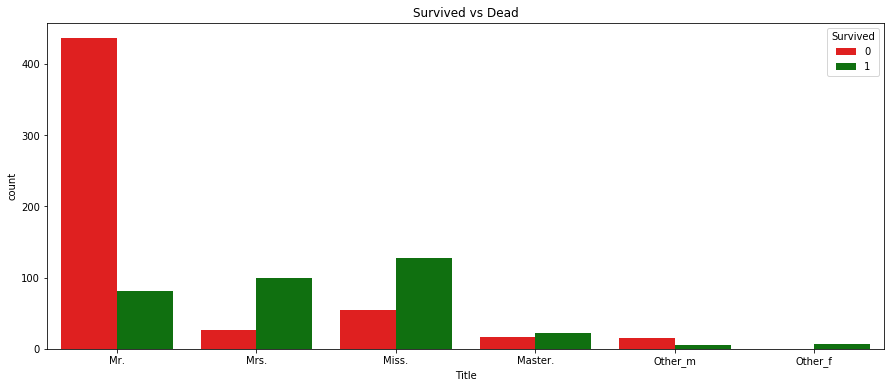

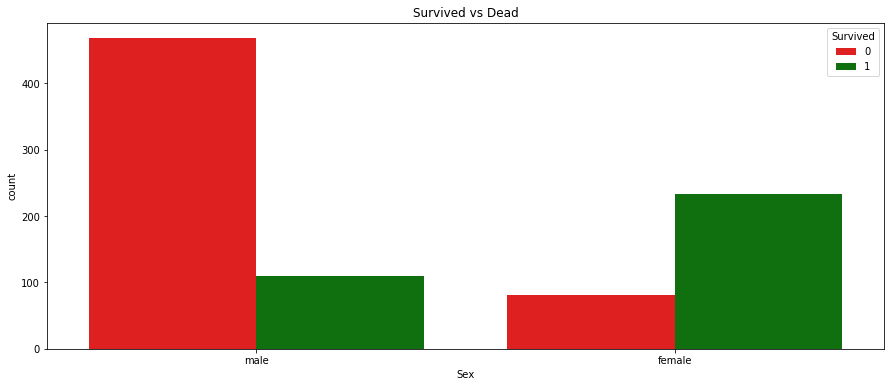

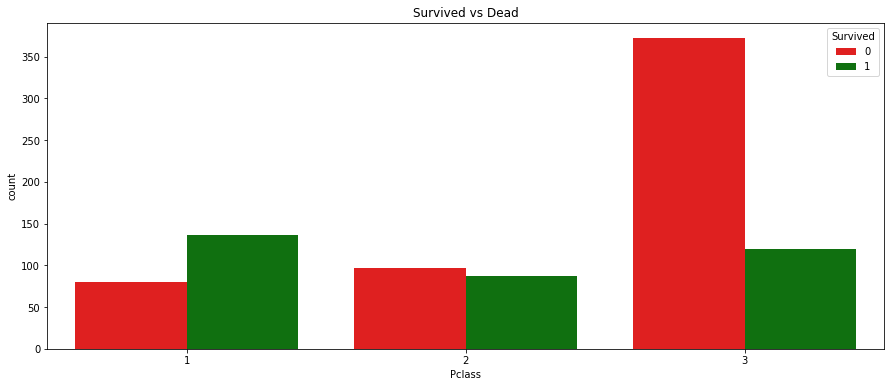

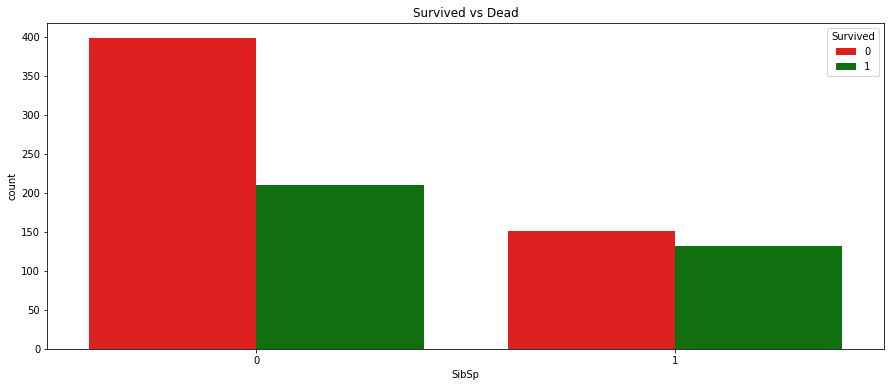

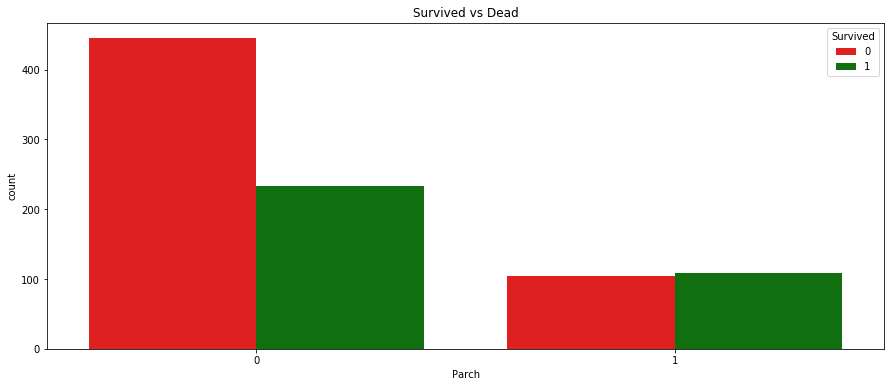

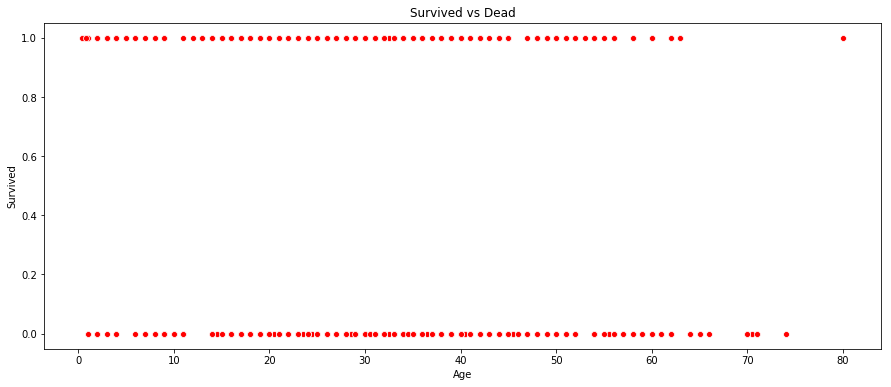

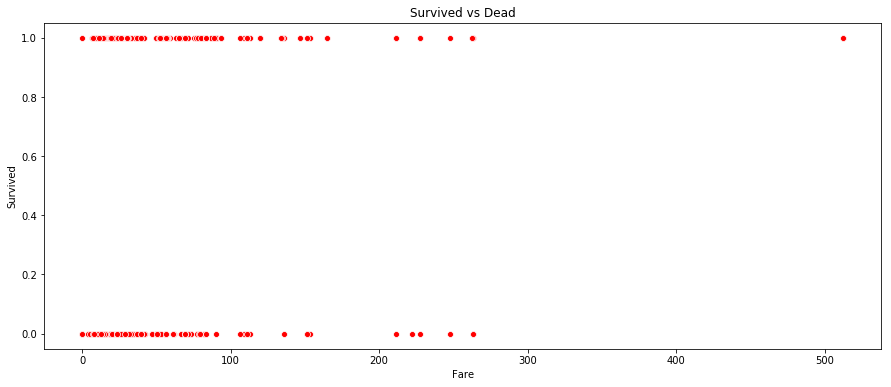

In [11]:
def plot(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #ax1 = plt.subplot(1, 2, 1)
    sns.set_palette(sns.color_palette(['r', 'g']))
    sns.countplot(hue='Survived', x=feature, data=train)
    #sns.countplot(train[feature][train.Survived == 1],ax=ax, color='g')
    #sns.countplot(train[feature][train.Survived == 0],ax=ax, color='r')
    plt.title('Survived vs Dead')
    #ax2 = plt.subplot(1, 2, 2)
    #sns.countplot(train[feature][train.Survived == 0],ax=ax2)
    #plt.title('Dead')
    
    #alive = train[train['Survived'] == 1][feature].value_counts()
    #dead = train[train['Survived'] == 0][feature].value_counts()
    #df = pd.DataFrame([alive, dead])
    #df.index = ['Survived', 'Dead']
    #df.plot(kind='bar', stacked=True, figsize=(10,5))
    
def plot_scatter(feature):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 6)
    #sns.set_palette(sns.color_palette(['r', 'g']))
    sns.scatterplot(x=feature, y='Survived', data=train, palette=['r','g'])
    plt.title('Survived vs Dead')
    
plot('Title')
plot('Sex')
plot('Pclass')
plot('SibSp')
plot('Parch')
plot_scatter('Age')
plot_scatter('Fare')

In [133]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [134]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr.
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs.
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr.
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr.
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs.


In [12]:
def convert(data):
    D = data[['Pclass', 'SibSp', 'Parch', 'Title']]
    D = pd.get_dummies(D, columns=['Title'])
    return D
    #D.groupby(D.columns.tolist(),as_index=False).size()

X_train = convert(train)
X_test = convert(test)
y_train = train['Survived']

# convert categorical variable 'sex' to numeric
#X_train['Sex_num'] = X_train['Sex'].apply(lambda x : 1 if x == "male" else 0)
#X_test['Sex_num'] = X_test['Sex'].apply(lambda x : 1 if x == "male" else 0)

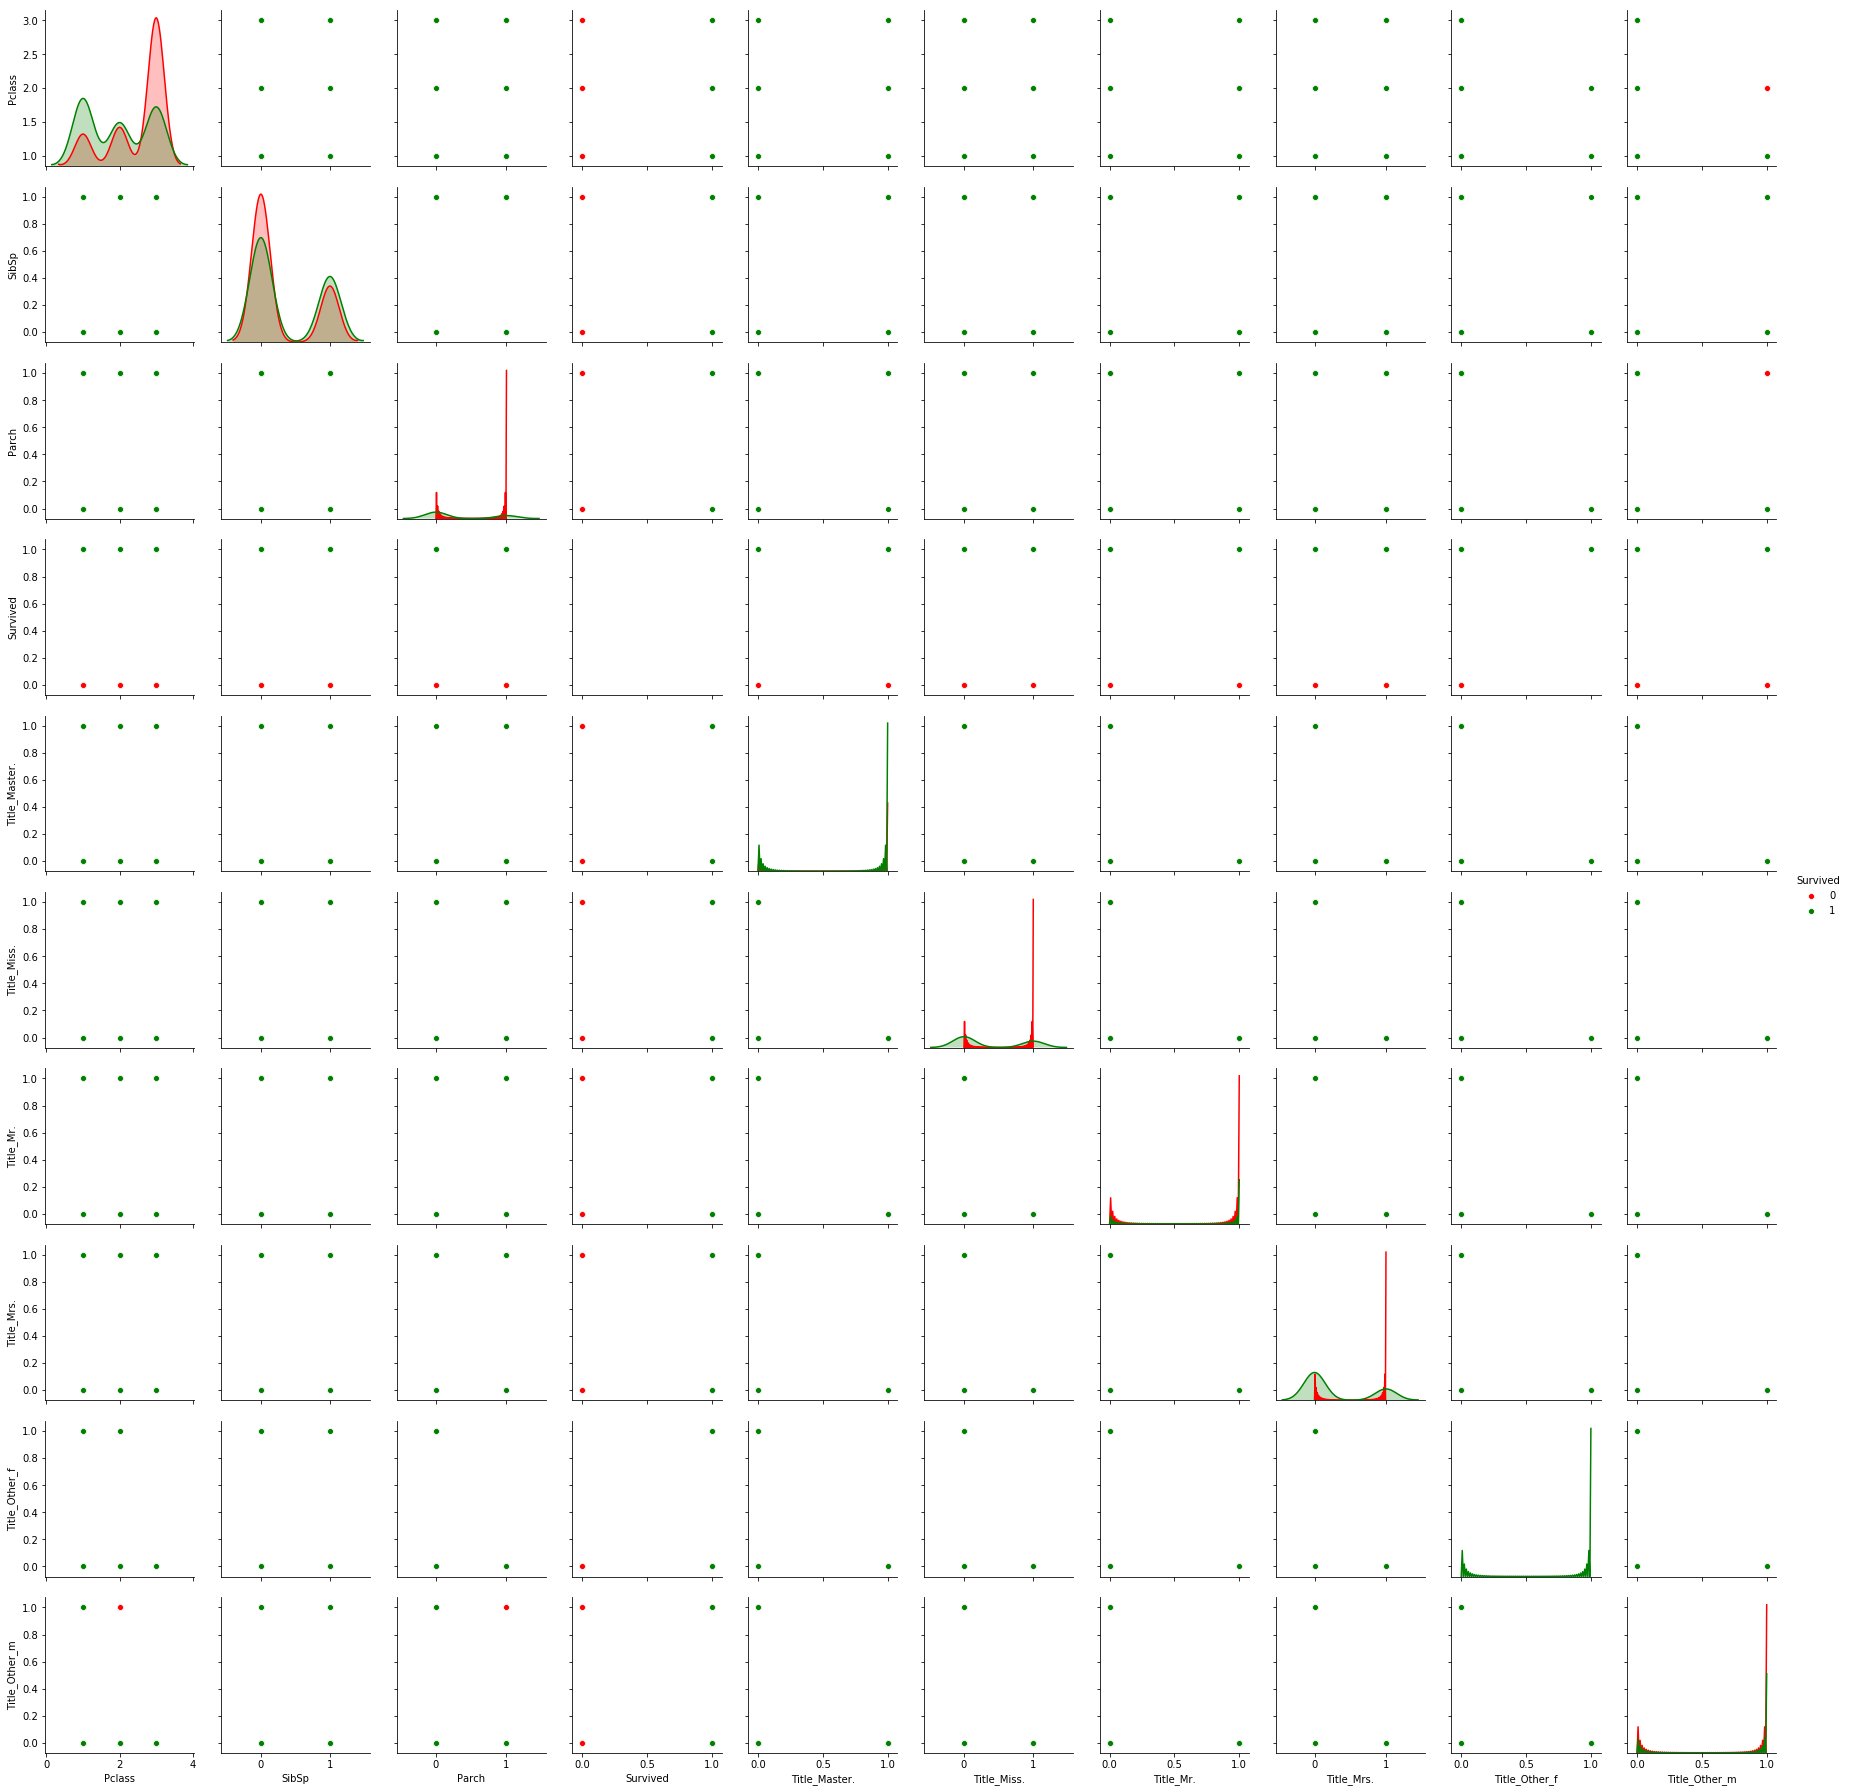

In [13]:
XYTr = train[['Pclass', 'SibSp', 'Parch', 'Title', 'Survived']]
XYTr = pd.get_dummies(XYTr, columns=['Title'])
sns.pairplot(XYTr, hue="Survived")
#XYTr.head()

In [140]:
y_train.shape

(891,)

In [141]:
# Topological analysis
# define neighbor as someone who has exactly the same features

#num_neighbors = np.zeros(X_train.shape[0])
#num_similar = np.zeros(X_train.shape[0])

#for i, row in train.iterrows():
    
    
#X_train.drop(columns=['Sex'], axis=1, inplace=True)
#X_train.head()
#X_test.drop(columns=['Sex'], axis=1, inplace=True)
#X_test.head()


In [14]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(
#X_train.isnull()
null_data = X_train[X_train.isnull().any(axis=1)]
null_data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


In [112]:
# Cross val
from sklearn.model_selection import train_test_split
xtr, xts, ytr, yts = train_test_split(X_train, y_train, test_size=0.2)

# Score
def score_model(ytr, ypr):
    num_correct = sum([x == y for (x,y) in zip(ytr, ypr)])
    return num_correct/len(ytr)

# Fit and score
def fit_and_score(model):
    print(model.__class__.__name__)
    model.fit(xtr, ytr)
    score = model.score(xts, yts)
    print("Test Score ", score)
    ypr = model.predict(xtr)
    trscore = score_model(ytr, ypr)
    print("Training Score ", trscore)
    print("\n")

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)
fit_and_score(model_rf)

from sklearn.svm import SVC
model_svm = SVC(gamma='auto')
fit_and_score(model_svm)

from sklearn.linear_model import LogisticRegression
model_lgr = LogisticRegression(solver='lbfgs')
fit_and_score(model_lgr)

from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
fit_and_score(model_knn)

# from sklearn.naive_bayes import GaussianNB
# model_nb = GaussianNB()
# fit_and_score(model_nb)



RandomForestClassifier
Test Score  0.7932960893854749
Training Score  0.827247191011236


SVC
Test Score  0.8100558659217877
Training Score  0.8202247191011236


LogisticRegression
Test Score  0.8044692737430168
Training Score  0.8146067415730337


KNeighborsClassifier
Test Score  0.7877094972067039
Training Score  0.827247191011236




In [113]:
def ensembleVoteClassifier(data):
    predictions_rf = model_rf.predict(data)
    predictions_svm = model_svm.predict(data)
    predictions_lgr = model_lgr.predict(data)
    predictions_knn = model_knn.predict(data)

    all_predictions = zip(predictions_rf, predictions_svm, predictions_lgr, predictions_knn)
    all_predictions = [list(x) for x in all_predictions]
    return [max(set(x), key=x.count) for x in all_predictions]

ytr_en = ensembleVoteClassifier(xtr)
print("Train score ", score_model(ytr_en, ytr))
yts_en = ensembleVoteClassifier(xts)
print("Test score ", score_model(yts_en, yts))

Train score  0.8216292134831461
Test score  0.8044692737430168


In [99]:
predictions = ensembleVoteClassifier(X_test)

In [100]:
predictionsDF = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : predictions})

In [101]:
predictionsDF.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [102]:
predictionsDF.to_csv("titanic_submission.csv", index=False)